<a href="https://colab.research.google.com/github/Imamahdysabilla/Artificial-Intellegence/blob/main/2217051141_ImamAhdySabilla_A_LogikaFuzzy_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#soal
Anda diminta untuk mengembangkan sistem irigasi otomatis menggunakan logika fuzzy. Sistem ini akan mengatur durasi irigasi berdasarkan kelembaban tanah. Anda perlu mendefinisikan himpunan fuzzy untuk kelembaban tanah dan durasi irigasi, serta aturan-aturan yang menghubungkan keduanya.

Himpunan Fuzzy:

Kelembaban Tanah:

Kering
Normal
Basah

Durasi Irigasi:

Pendek
Sedang
Panjang

Aturan Fuzzy:

Jika Kelembaban Tanah Kering maka Durasi Irigasi Panjang.

Jika Kelembaban Tanah Normal maka Durasi Irigasi Sedang.

Jika Kelembaban Tanah Basah maka Durasi Irigasi Pendek.

#Library

In [3]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=3b3c2c058e75474c64813845d9ddc41bbc3e01e9e0378443b240f025519f50d5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Mendefinisikan variabel fuzzy untuk Kelembaban Tanah dan Durasi Irigasi

In [5]:
kelembaban = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembaban')
durasi_irigasi = ctrl.Consequent(np.arange(0, 61, 1), 'durasi_irigasi')

Mendefinisikan himpunan fuzzy untuk Kelembaban Tanah

In [6]:
kelembaban['kering'] = fuzz.trimf(kelembaban.universe, [0, 0, 50])
kelembaban['normal'] = fuzz.trimf(kelembaban.universe, [30, 50, 70])
kelembaban['basah'] = fuzz.trimf(kelembaban.universe, [60, 100, 100])

Mendefinisikan himpunan fuzzy untuk Durasi Irigasi

In [7]:
durasi_irigasi['pendek'] = fuzz.trimf(durasi_irigasi.universe, [0, 0, 20])
durasi_irigasi['sedang'] = fuzz.trimf(durasi_irigasi.universe, [15, 30, 45])
durasi_irigasi['panjang'] = fuzz.trimf(durasi_irigasi.universe, [40, 60, 60])

Visualisasi himpunan fuzzy

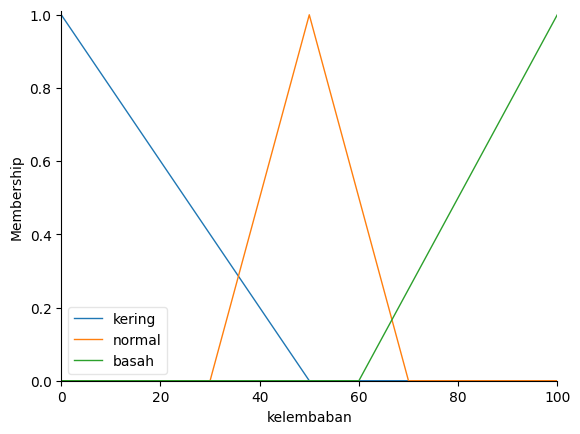

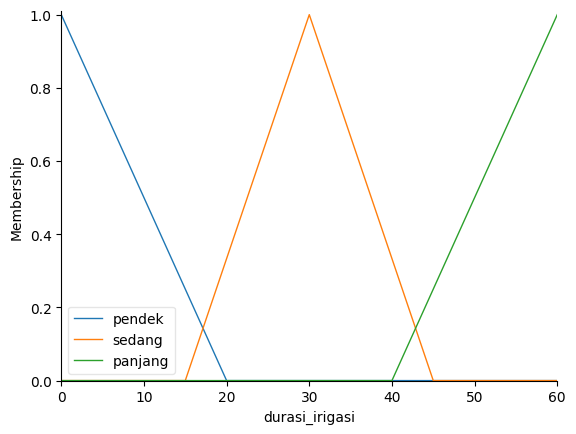

In [8]:
kelembaban.view()
durasi_irigasi.view()

Mendefinisikan aturan fuzzy

In [9]:
rule1 = ctrl.Rule(kelembaban['kering'], durasi_irigasi['panjang'])
rule2 = ctrl.Rule(kelembaban['normal'], durasi_irigasi['sedang'])
rule3 = ctrl.Rule(kelembaban['basah'], durasi_irigasi['pendek'])

Membuat sistem kontrol fuzzy

In [10]:
sistem_kontrol_irigasi = ctrl.ControlSystem([rule1, rule2, rule3])
simulasi_sistem = ctrl.ControlSystemSimulation(sistem_kontrol_irigasi)

Mensimulasikan input kelembaban tanah

In [11]:
input_kelembaban = 45  # Contoh kelembaban tanah input
simulasi_sistem.input['kelembaban'] = input_kelembaban

 Menjalankan simulasi

In [12]:
simulasi_sistem.compute()

Mendapatkan output durasi irigasi

In [13]:
output_durasi_irigasi = simulasi_sistem.output['durasi_irigasi']
print(f"Kelembaban tanah input: {input_kelembaban}%")
print(f"Durasi irigasi yang dihasilkan: {output_durasi_irigasi:.2f} menit")

Kelembaban tanah input: 45%
Durasi irigasi yang dihasilkan: 32.23 menit


Visualisasi hasil output

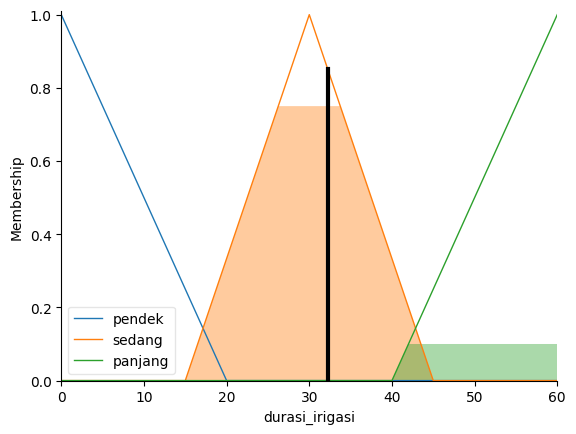

In [14]:
durasi_irigasi.view(sim=simulasi_sistem)

Penjelasan:

Definisi Variabel Fuzzy:

Kita mendefinisikan variabel fuzzy untuk kelembaban tanah (0-100%) dan durasi irigasi (0-60 menit).

Himpunan Fuzzy:

Kita menggunakan fungsi trimf untuk mendefinisikan himpunan fuzzy (kering, normal, basah) untuk kelembaban tanah dan (pendek, sedang, panjang) untuk durasi irigasi.

Aturan Fuzzy:

Tiga aturan fuzzy didefinisikan untuk menghubungkan kelembaban tanah dengan durasi irigasi.

Sistem Kontrol:

Sistem kontrol dibuat dan disimulasikan dengan input kelembaban tanah 45% untuk mengatur durasi irigasi.
Visualisasi: Grafik himpunan fuzzy dan hasil simulasi ditampilkan.